In [187]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Adaline

O algoritmo Adaline é particularmente interessante porque ilustra os conceitos-chave de definir e minimizar funções de perda contínuas. Isso estabelece a base para entender outros algoritmos de aprendizado de máquina para classificação, como regressão logística, máquinas de vetor de suporte e redes neurais multicamadas, além de modelos de regressão linear.

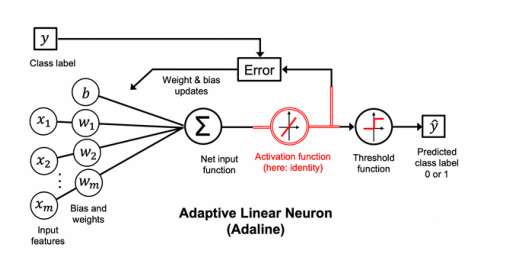

In [188]:
plt.imshow(plt.imread('img/adaline.png'))
plt.axis('off')  # Remove os eixos para uma visualização mais limp
plt.show()

o algoritmo Adaline compara os rótulos de classe verdadeiros com a saída de valor contínuo da função de ativação linear para calcular o erro do modelo e atualizar os pesos. Em contraste, o perceptron compara os rótulos de classe verdadeiros com os rótulos de classe previstos.

Um dos ingredientes chave dos algoritmos de aprendizado de máquina supervisionado é uma função **objetivo definida que deve ser otimizada durante o processo de aprendizado. Esta função objetivo é frequentemente uma função de perda ou custo que queremos minimizar.** No caso do Adaline, podemos definir a função de perda, L, para aprender os parâmetros do modelo como o erro quadrático médio (MSE) entre o resultado calculado e o rótulo de classe verdadeiro.


$$L = \frac{1}{2} \sum_{i}^{n} (y^{(i)} - \phi(z^{(i)}))^2$$


In [189]:
class AdalineSG:
    """Adaptivo neurio linear classificador  
    
    Params  
    ----------
    eta : float
        taxa de aprendizado (default: 0.01)
    
    max_iter : int
        número máximo de iterações (default: 50)
    
    Attributes
    ----------
    weights_ : array-like, shape (n_features, 1)
        pesos do modelo
    bias_ : float
        bias do modelo
    losses_  : list
        erros de treinamento
    """
    def __init__(self, eta=0.01, max_iter=50,random_state=1):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        torch.manual_seed(self.random_state)

        self.weights_ = torch.normal(mean=0.0, std=0.01, dtype=torch.float32, size=X.shape[1:]).reshape(-1,1)

        self.bias_  = torch.tensor(0.0, dtype=torch.float32)
        self.losses = []
        for i in range(self.max_iter):
            net_input_ = self.net_input(X)
            saida = self.activation(net_input_)
            

            # Calcula o error
            erros =  (y.reshape(-1, 1) - saida)
            # atualiza os pesos
            self.weights_ += self.eta * 2.0 * X.T@erros / X.shape[0]
            self.bias_    += self.eta * 2.0 * torch.mean(erros)
            loss = torch.mean((erros ** 2))

            self.losses.append(loss)
        return self

    def net_input(self, X):
        return X@self.weights_  + self.bias_
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return torch.where(
            self.activation(self.net_input(X)) >= 0.5, 1, 0
        )
        

In [190]:
from sklearn.datasets import load_iris

In [191]:
X, y = load_iris(return_X_y=True)

In [192]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [193]:
y = torch.where(y == 1, 1, 0)

In [194]:
ada = AdalineSG()

In [195]:
ada.fit(X, y)

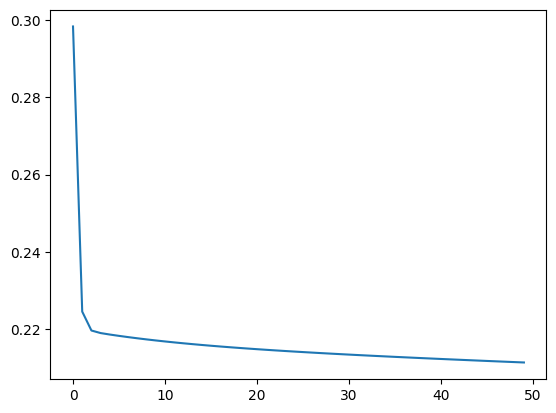

In [196]:
plt.plot(ada.losses)

In [197]:
from sklearn.metrics import classification_report

In [198]:
print(classification_report(y.reshape(-1, 1), ada.predict(X)))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76       100
           1       0.00      0.00      0.00        50

    accuracy                           0.61       150
   macro avg       0.32      0.46      0.38       150
weighted avg       0.43      0.61      0.51       150

